In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pickle

# Preparing The Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pickle_in = open("/content/drive/MyDrive/petskindata/X.pickle","rb")
X=pickle.load(pickle_in)
pickle_in = open("/content/drive/MyDrive/petskindata/y.pickle","rb")
y=pickle.load(pickle_in)
pickle_in = open("/content/drive/MyDrive/petskindata/X_test.pickle","rb")
X_test=pickle.load(pickle_in)
pickle_in = open("/content/drive/MyDrive/petskindata/y_test.pickle","rb")
y_test=pickle.load(pickle_in)

In [ ]:
print(X[0], y[0], X_test[0], y_test[0])

[[[166 159 141]
  [162 154 137]
  [161 150 133]
  ...
  [168 169 157]
  [162 172 161]
  [142 162 160]]

 [[172 168 156]
  [165 160 149]
  [175 170 161]
  ...
  [145 141 131]
  [124 125 110]
  [101 115 109]]

 [[183 185 174]
  [187 188 180]
  [185 184 177]
  ...
  [131 123 114]
  [130 115 108]
  [ 90  80  78]]

 ...

 [[186 177 172]
  [174 164 162]
  [176 166 166]
  ...
  [ 15  32  39]
  [ 14  31  38]
  [  6  16  25]]

 [[186 176 167]
  [177 168 162]
  [178 163 165]
  ...
  [ 22  37  44]
  [ 22  37  44]
  [  5  20  27]]

 [[183 170 163]
  [159 144 138]
  [160 149 149]
  ...
  [ 40  53  61]
  [ 21  36  43]
  [ 22  37  44]]] 3 [[[146 136 126]
  [151 143 138]
  [180 178 173]
  ...
  [205 238 240]
  [197 224 233]
  [193 223 233]]

 [[147 137 127]
  [140 130 124]
  [172 171 166]
  ...
  [230 254 254]
  [202 232 241]
  [198 228 238]]

 [[146 136 126]
  [146 135 129]
  [175 174 169]
  ...
  [202 226 232]
  [200 227 238]
  [198 225 236]]

 ...

 [[101 119 119]
  [ 96 115 121]
  [108 128 129]
  

In [ ]:
class_names = ["A1_구진_플라크","A2_비듬_각질_상피성잔고리","A3_태선화_과다색소침착","A4_농포_여드름","A5_미란_궤양","A6_결절_종괴"]

In [ ]:
class_names[y[0]]

'A4_농포_여드름'

In [ ]:
y=np.array(y)
y_test=np.array(y_test)

# Training The Model


In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(100,100,3),
                   pooling='avg',classes=6,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(6, activation='softmax'))

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 6)                3078      
 pper)                                                           
                                                                 
Total params: 24,639,878
Trainable params: 1,052,166
Non-trainable params: 23,587,712
____________________________________

In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs=30
history = resnet_model.fit(X,y, epochs=epochs, validation_split=0.2)

Epoch 1/30
1330/1330 [==============================] - 53s 39ms/step - loss: 0.8174 - accuracy: 0.6837 - val_loss: 1.5905 - val_accuracy: 0.4709
Epoch 2/30
1330/1330 [==============================] - 52s 39ms/step - loss: 0.7630 - accuracy: 0.7052 - val_loss: 1.6799 - val_accuracy: 0.4640
Epoch 3/30
1330/1330 [==============================] - 52s 39ms/step - loss: 0.7149 - accuracy: 0.7250 - val_loss: 1.7208 - val_accuracy: 0.4634
Epoch 4/30
1330/1330 [==============================] - 51s 39ms/step - loss: 0.6739 - accuracy: 0.7416 - val_loss: 1.7894 - val_accuracy: 0.4643
Epoch 5/30
1330/1330 [==============================] - 51s 39ms/step - loss: 0.6311 - accuracy: 0.7590 - val_loss: 1.8632 - val_accuracy: 0.4680
Epoch 6/30
1330/1330 [==============================] - 51s 39ms/step - loss: 0.5906 - accuracy: 0.7735 - val_loss: 1.9124 - val_accuracy: 0.4663
Epoch 7/30
1330/1330 [==============================] - 51s 39ms/step - loss: 0.5582 - accuracy: 0.7847 - val_loss: 1.9313 -

# Evaluating The Model

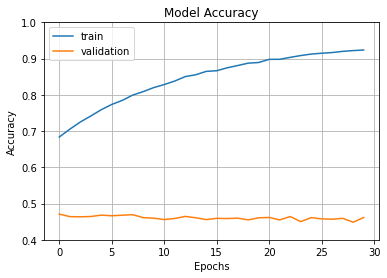

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

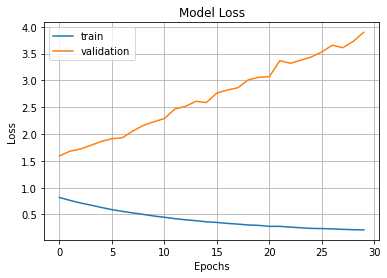

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
resnet_model.evaluate(X_test, y_test)

208/208 [==============================] - 6s 31ms/step - loss: 4.7169 - accuracy: 0.3949


[4.716928005218506, 0.39491498470306396]